In [86]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
pytrend = TrendReq()
plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

In [101]:
brands =['Louis Vuitton','Gucci', 'Hermes', 'Dior', 'Bottega veneta'] 

In [102]:
brands_codes =[pytrend.suggestions(keyword=i)[0] for i in brands] 

In [103]:
df_brands= pd.DataFrame(brands_codes)

In [104]:
exact_keywords=df_brands['mid'].to_list()
date_interval ='2020-01-01 2021-01-01'
#Countries=["US","IT","FR"] #Country code
category=185 # Select categories
search_type ='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [105]:
individual_exact_keyword = list(zip(*[iter(exact_keywords)]*1))

In [106]:
individual_exact_keyword = [list(x) for x in individual_exact_keyword]

In [137]:
dicti = {}
i = 1
for keyword in individual_exact_keyword:
    pytrend.build_payload(kw_list=keyword, 
                          timeframe = date_interval, 
                          cat=category,
                          gprop=search_type) 
    dicti[i] = pytrend.interest_over_time()
    i+=1
df_brands_data = pd.concat(dicti, axis=1)

In [138]:
df_brands_data.columns = df_brands_data.columns.droplevel(0) #drop outside header

In [139]:
df_brands_data = df_brands_data.drop('isPartial', axis = 1) #drop "isPartial"
df_brands_data.reset_index(level=0,inplace=True) #reset_index
df_brands_data.columns=['date','Louis Vuitton','Gucci', 'Hermes', 'Dior', 'Bottega veneta'] #change column names

In [151]:
df_brands_data

,date,Louis Vuitton,Gucci,Hermes,Dior,Bottega veneta
0,2020-01-05,81,44,64,57,72
1,2020-01-12,77,41,68,57,52
2,2020-01-19,77,39,56,66,60
3,2020-01-26,67,31,73,53,42
4,2020-02-02,69,34,50,59,45
5,2020-02-09,74,36,64,60,59
6,2020-02-16,72,38,63,62,89
7,2020-02-23,69,36,47,60,97
8,2020-03-01,65,33,74,58,53
9,2020-03-08,57,30,40,51,53


In [152]:
df_brands_data.set_index("date")

,Louis Vuitton,Gucci,Hermes,Dior,Bottega veneta
date,,,,,
2020-01-05,81,44,64,57,72
2020-01-12,77,41,68,57,52
2020-01-19,77,39,56,66,60
2020-01-26,67,31,73,53,42
2020-02-02,69,34,50,59,45
2020-02-09,74,36,64,60,59
2020-02-16,72,38,63,62,89
2020-02-23,69,36,47,60,97
2020-03-01,65,33,74,58,53


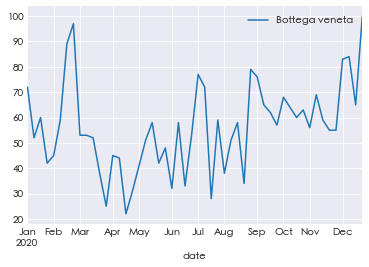

In [162]:
df_brands_data.plot(x = "date" , y = brands[4])